In [ ]:
# NumPy kütüphanesini içe aktarma
import numpy as np

# Pandas kütüphanesini içe aktarma
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Seaborn ve Matplotlib kütüphanelerini içe aktarma (veri görselleştirmesi için)
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn kütüphanesinden model seçimi ve değerlendirme için gerekli modülleri içe aktarma
from sklearn.model_selection import train_test_split  # Veriyi eğitim ve test setlerine bölmek için
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error  # Model performansını değerlendirmek için
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor   # Rastgele Orman modeli
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet # Doğrusal Regresyon modeli
from sklearn.tree import DecisionTreeClassifier  # Karar Ağaçları modeli
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor  # K-en Yakın Komşular modeli







In [ ]:
insurance= pd.read_csv('Melbourne_housing_FULL.csv')

In [ ]:
df=insurance.copy() # gerçek veriyi bozmamak için veriyi kopyaladık
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
print(df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [ ]:
print(df['Bedroom2'])

0        2.0
1        2.0
2        2.0
3        3.0
4        3.0
        ... 
34852    4.0
34853    2.0
34854    2.0
34855    NaN
34856    2.0
Name: Bedroom2, Length: 34857, dtype: float64


In [ ]:
df['Suburb'] = df['Suburb'].astype('category')
df['Address'] = df['Address'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Method'] = df['Method'].astype('category')
df['SellerG'] = df['SellerG'].astype('category')
df['CouncilArea'] = df['CouncilArea'].astype('category')
df['Regionname'] = df['Regionname'].astype('category')

In [ ]:
# "Tarih" verisini datetime veri tipine çevir
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [ ]:
# "Ay" ve "Yıl" sütunlarını oluştur
df['Month'] = df['Date'].dt.month.astype('category')
df['Year'] = df['Date'].dt.year.astype('category')

In [ ]:
df = df.drop(columns=['Date'])  # 'Date' sütununu veri çerçevesinden çıkarma


In [ ]:
df.isna().sum() #üzerinde kullanılan bir işlemdir ve eksik (NaN) değerlerin her sütundaki toplam sayısını verir.

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Month                0
Year                 0
dtype: int64

In [ ]:
duplicates = df.duplicated()
print(duplicates)


0        False
1        False
2        False
3        False
4        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Length: 34857, dtype: bool


In [ ]:
df = df.drop_duplicates()


In [ ]:
# Aykırı değerler için üst sınırları belirleme
upper_bound_landsize = df['Landsize'].quantile(0.95)  # %95'lik quantile değeri
upper_bound_buildingarea = df['BuildingArea'].quantile(0.95)  # %95'lik quantile değeri

In [ ]:
# Aykırı değerleri temizleme
df = df[(df['Landsize'] < upper_bound_landsize) & (df['BuildingArea'] < upper_bound_buildingarea)]


In [ ]:
df.isna().sum() #üzerinde kullanılan bir işlemdir ve eksik (NaN) değerlerin her sütundaki toplam sayısını verir.

Suburb              0
Address             0
Rooms               0
Type                0
Price            2447
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               174
Landsize            0
BuildingArea        0
YearBuilt         362
CouncilArea         0
Lattitude           8
Longtitude          8
Regionname          0
Propertycount       0
Month               0
Year                0
dtype: int64

In [ ]:
# Doldurulacak sütun isimlerini içeren bir liste oluşturun
sutunlar = ['Price', 'Car','YearBuilt','Lattitude','Longtitude']

# Her bir sütunu döngü ile doldurun
for sutun in sutunlar:
    mode_deger = df[sutun].mode().iloc[0]  # Mod değerini bulma
    df[sutun].fillna(mode_deger, inplace=True)  # Eksik değerleri mod değeri ile doldurma


In [ ]:
df.isna().sum() #üzerinde kullanılan bir işlemdir ve eksik (NaN) değerlerin her sütundaki toplam sayısını verir.

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Month            0
Year             0
dtype: int64

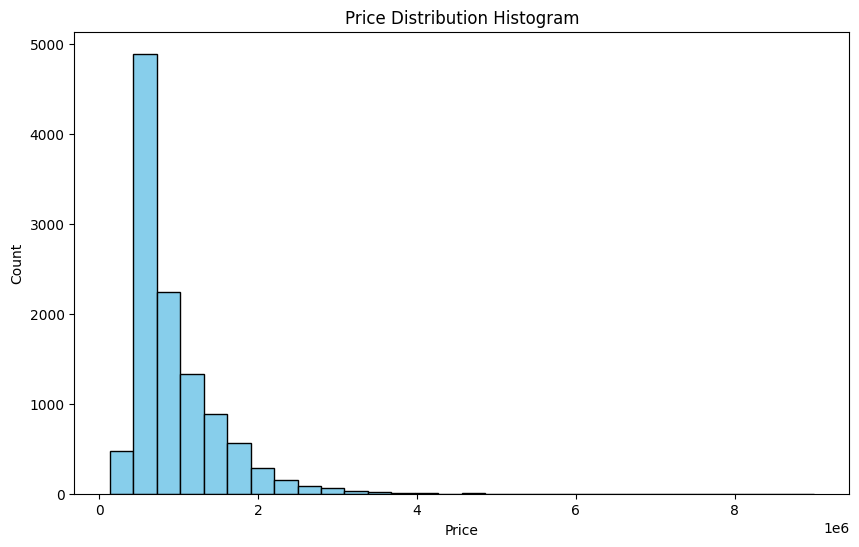

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for the 'Price' column
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution Histogram')
plt.show()


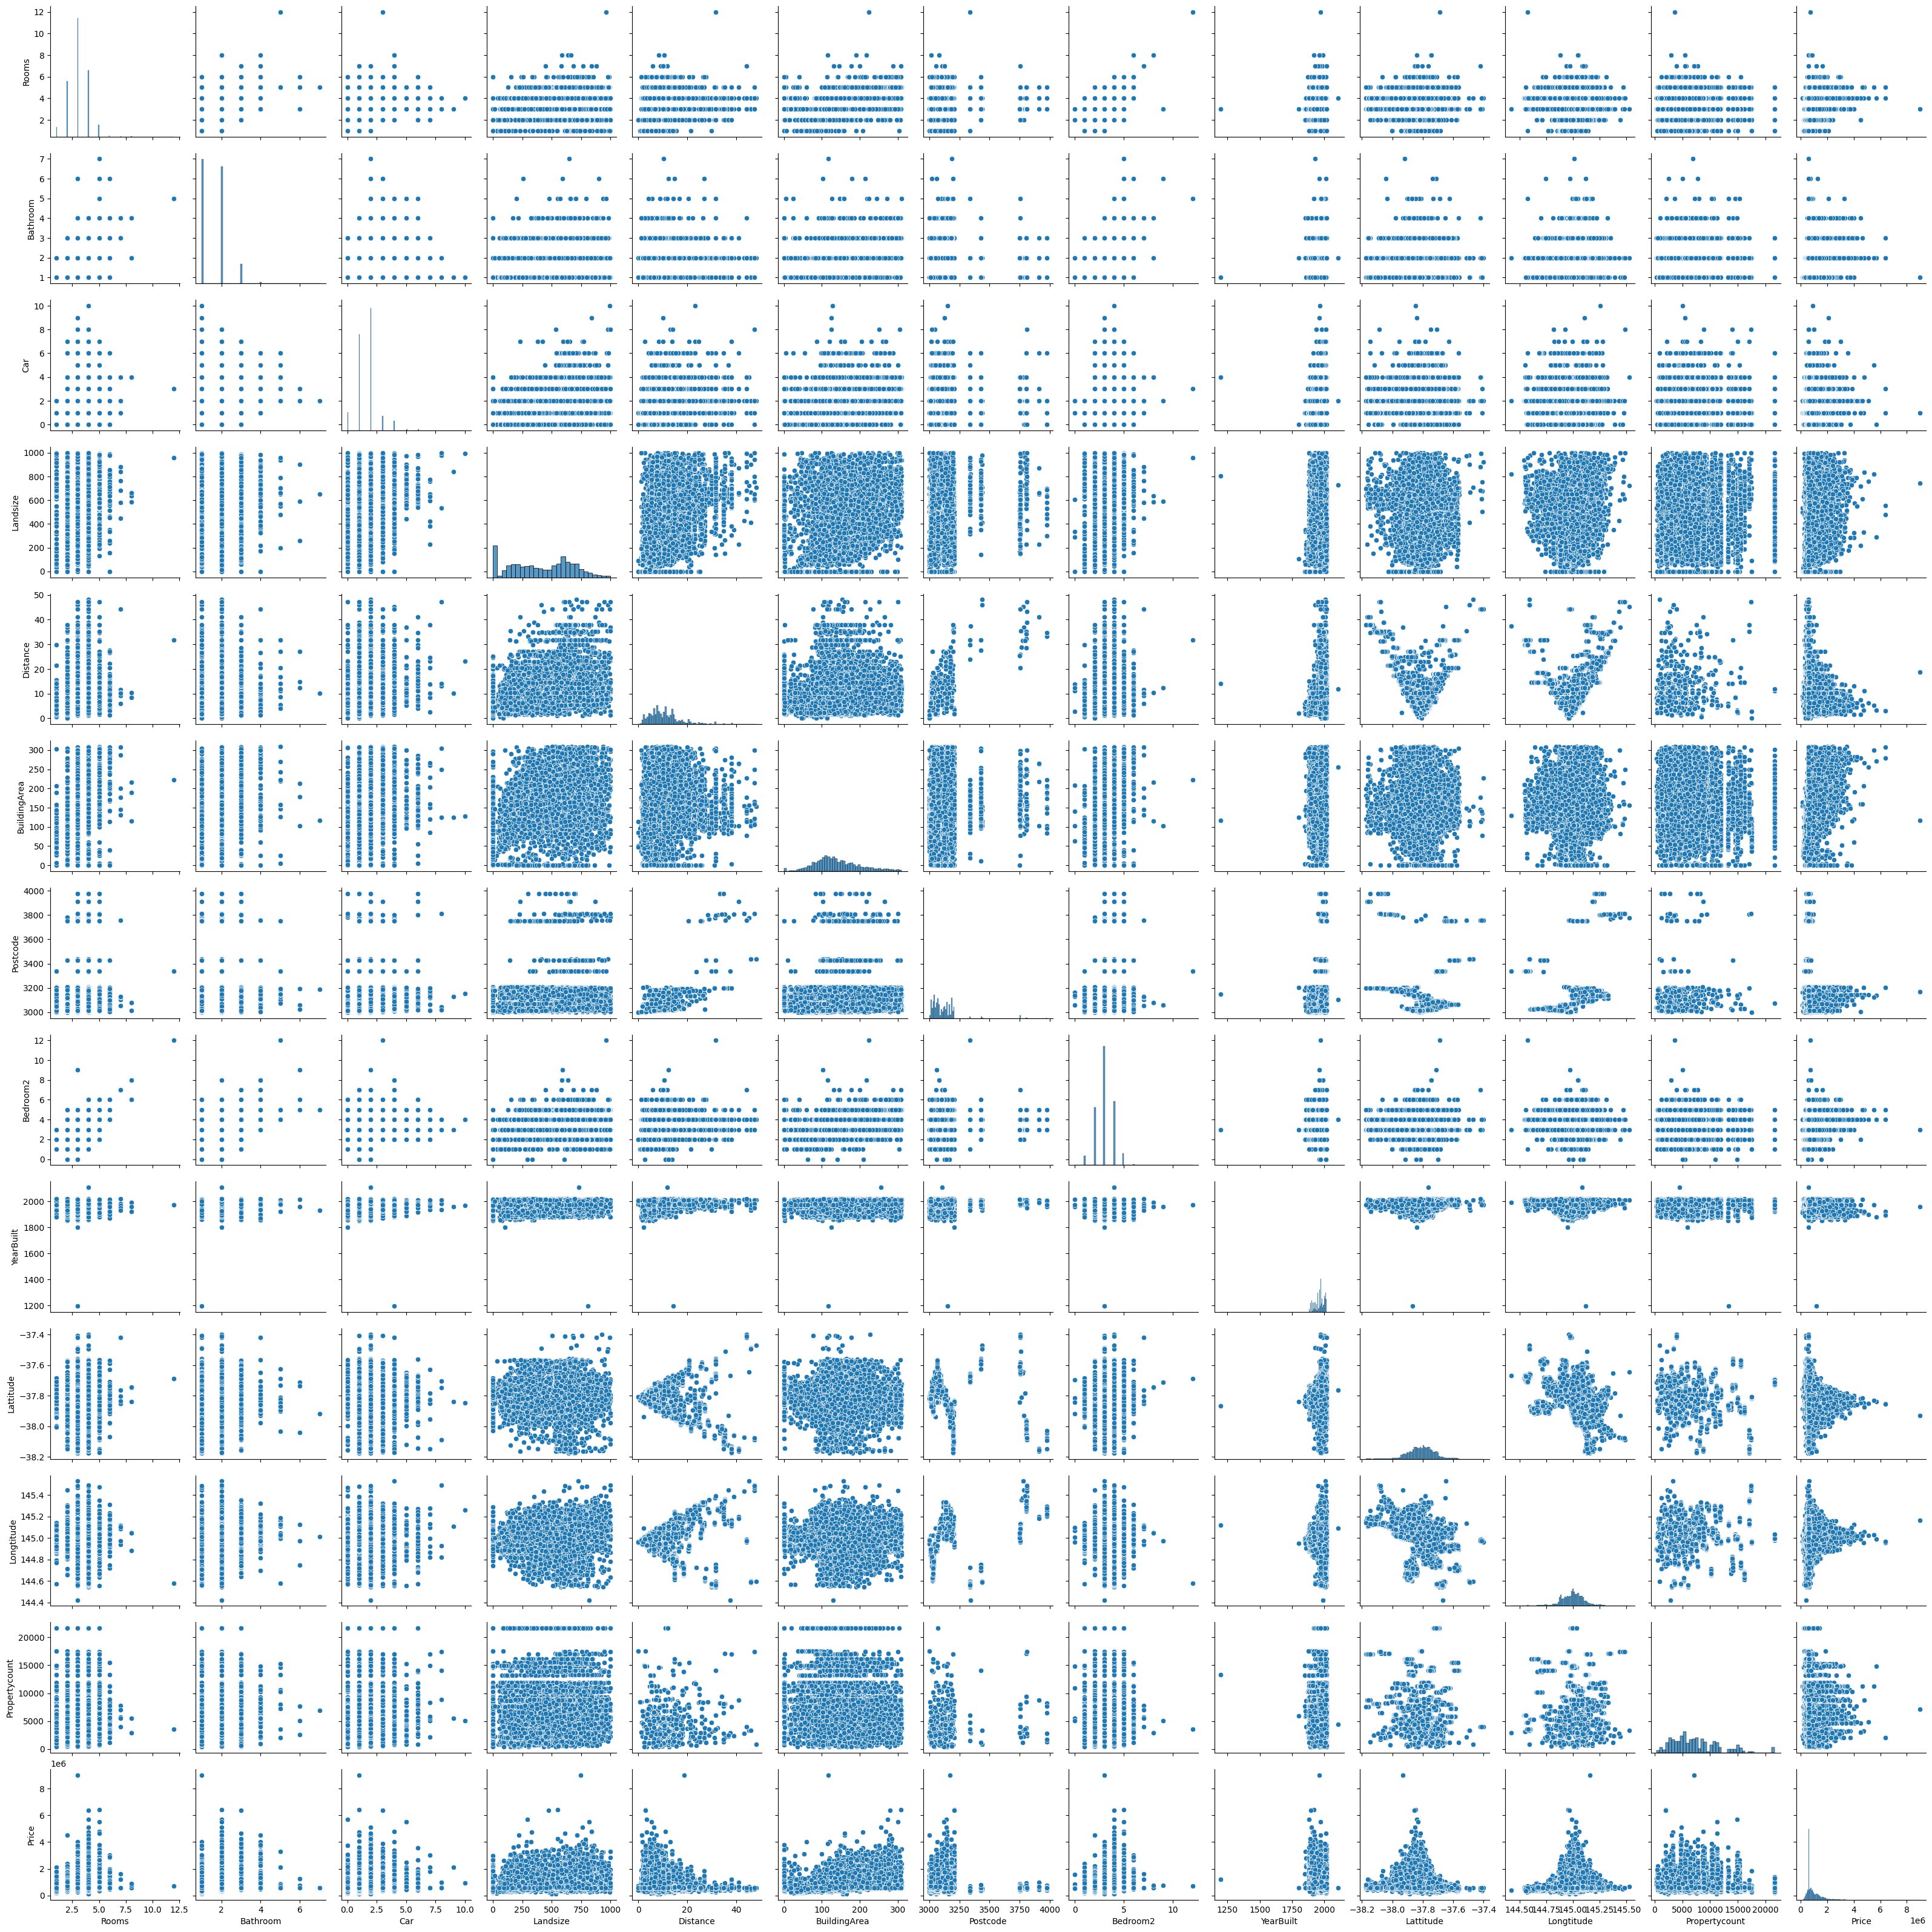

In [ ]:


# Create a pair plot for numerical variables and price
sns.pairplot(df[['Rooms', 'Bathroom', 'Car', 'Landsize','Distance','BuildingArea','Postcode','Bedroom2', 'YearBuilt','Lattitude','Longtitude','Propertycount','Price']])
plt.show()


<ipython-input-70-210240c93c83>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


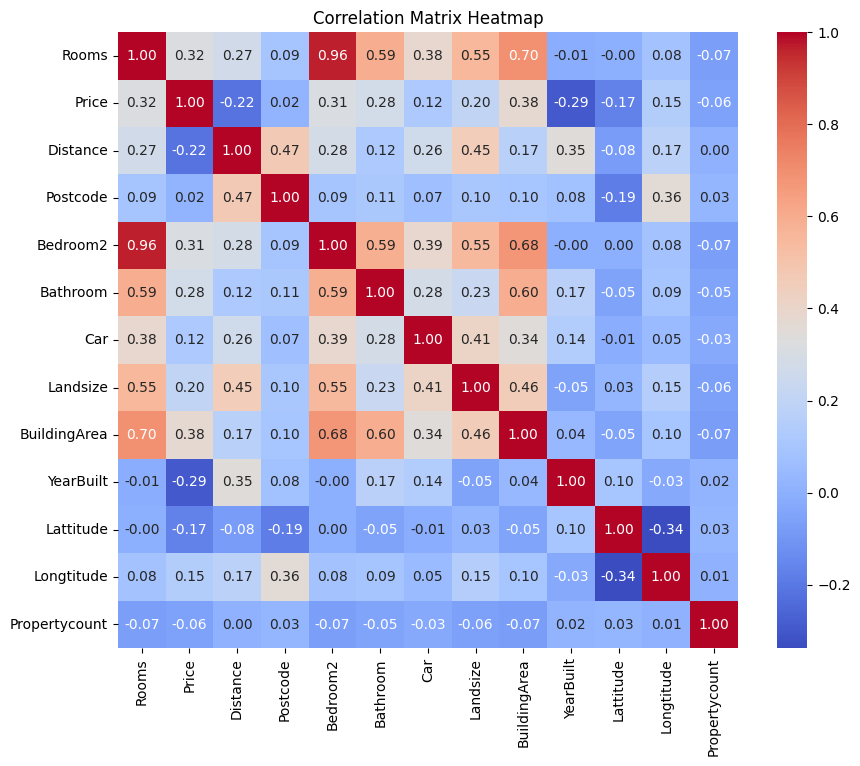

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
label_encoder = LabelEncoder()

# Birden fazla kategorik değişkeni dönüştürme örneği
categorical_columns = ['Suburb', 'Address','Type', 'Method','SellerG','CouncilArea', 'Regionname','Month','Year']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [ ]:
# Birden fazla kategorik değişkeni one-hot encoding ile dönüştürme
categorical_columns = ['Suburb', 'Address','Type', 'Method','SellerG','CouncilArea', 'Regionname','Month','Year']
df_encoded = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
# Özellikler (X) ve hedef değişken (y) seçimi
features = df_encoded.drop(columns=['Price'])  # X olarak kullanılacak özellikler
target = df_encoded['Price']  # Hedef değişken

In [ ]:
# Veriyi eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Modellerin tanımlanması
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
}


In [ ]:
# Modelleri eğitme ve değerlendirme
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Modeli eğitme
    y_pred = model.predict(X_test)  # Test seti üzerinde tahmin yapma
    mse = mean_squared_error(y_test, y_pred)  # Ortalama kare hatası hesaplama
    results[model_name] = mse  # Sonuçları sözlüğe ekleme



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.478e+13, tolerance: 2.643e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Sonuçları görüntüleme
print("Mean Squared Errors:")
for model_name, mse in results.items():
    print(f"{model_name}: {mse}")


Mean Squared Errors:
Lasso: 187396903409.37512
LinearRegression: 1299119854311894.0
Ridge: 158540492823.21945
ElasticNet: 180897106404.99417
KNeighborsRegressor: 262096118381.57843
RandomForestRegressor: 143296007313.43787
GradientBoostingRegressor: 149915012440.70053
AdaBoostRegressor: 210217277417.6819


In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)
print(important_features)


BuildingArea                        0.201260
YearBuilt                           0.175457
Regionname_Southern Metropolitan    0.069709
Distance                            0.050167
Method_SN                           0.040558
                                      ...   
Address_2/18 Eighth St              0.000000
Address_2/18 Doncaster Rd           0.000000
Address_2/18 De Carle St            0.000000
Address_2/18 Darebin St             0.000000
Address_2A Piper St                 0.000000
Length: 34837, dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE: ", -scores.mean())


Cross-Validation MSE:  167245254683.44525


In [ ]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']